<a href="https://colab.research.google.com/github/day28645/Applied-Data-Science/blob/main/week8_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
# data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

# random generate
from sklearn.ensemble import RandomForestClassifier

# Load the dataset

In [ ]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
#Print the taret_name and feature_name
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
col_name = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

# Create dataframe

In [ ]:
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Prepare data

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis='columns'), iris.target, test_size=0.2)

# Train Model #1

In [ ]:
model_1 = RandomForestClassifier(criterion='gini', n_estimators=100)
model_1.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model_1.score(X_test,y_test)

0.9333333333333333

In [ ]:
def add_label(ax):
  for label in ax.containers:
    ax.bar_label(label)

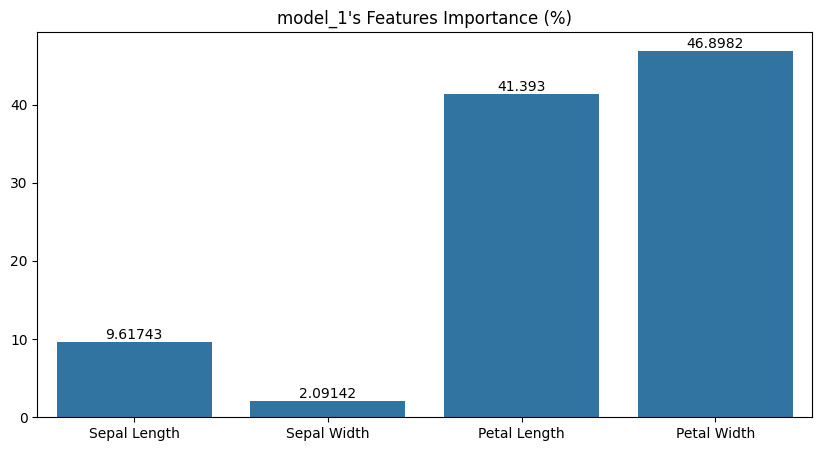

In [ ]:
# Get feature importances
feature_importances = model_1.feature_importances_

plt.figure(figsize=(10, 5))
plt.title("model_1's Features Importance (%)")
m1 = sns.barplot(x=col_name, y=[i*100 for i in feature_importances])
add_label(m1)
plt.show()

## Visualizing Model

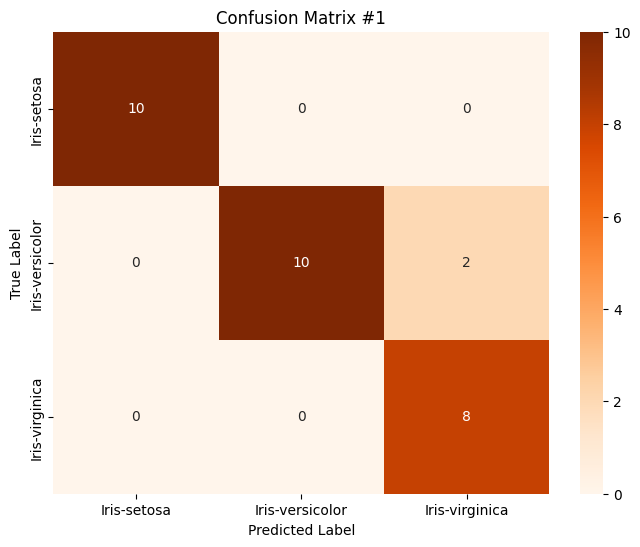

In [ ]:
y_pred_1 = model_1.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_1)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix #1')
plt.show()

# Train Model #2

In [ ]:
model_2 = RandomForestClassifier(criterion='entropy', max_depth=5)
model_2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [ ]:
model_2.score(X_test,y_test)

0.9333333333333333

## Visualizing Model

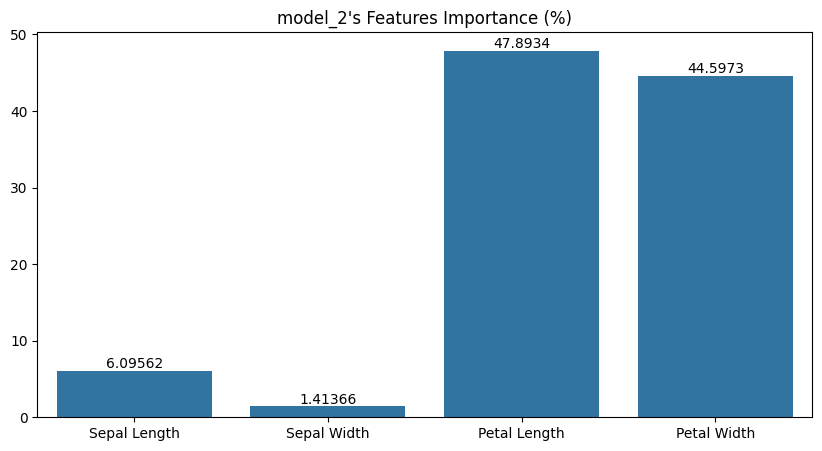

In [ ]:
# Get feature importances
feature_importances = model_2.feature_importances_

plt.figure(figsize=(10, 5))
plt.title("model_2's Features Importance (%)")
m2 = sns.barplot(x=col_name, y=[i*100 for i in feature_importances])
add_label(m2)
plt.show()

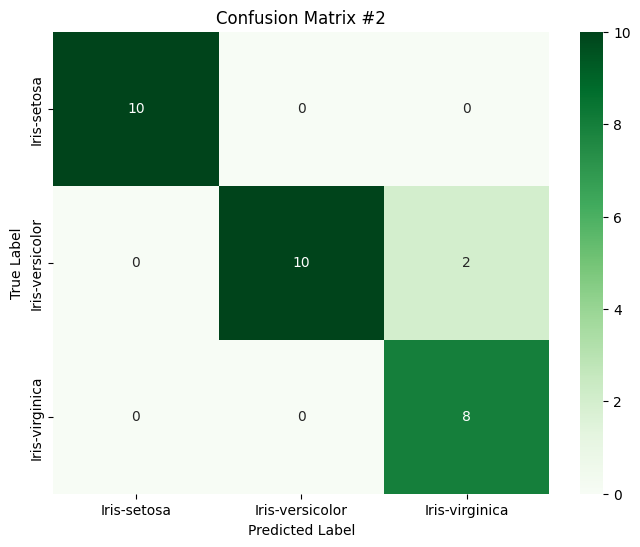

In [ ]:
y_pred_2 = model_2.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_2)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix #2')
plt.show()